In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
titanic=pd.read_csv('titanic.csv',sep=',')
titanic.head(6)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583


## Exploracion de datos

In [6]:
titanic.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,27.0,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [5]:
# delete columns with no value, like the name and fare (we already know its class seats)
columns_to_drop = ['Name', 'Fare']
titanic.drop(columns_to_drop, axis='columns', inplace=True)

In [7]:
#rename columns
titanic.columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
titanic.head(5)


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [8]:
# analys the shape of the data
print(titanic.shape)

(887, 6)


In [9]:
# analysi the types of data
print(titanic.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object


In [13]:
# let's change the object variabble to numeric
titanic=pd.get_dummies(titanic,columns=['Sex'],drop_first=True)

KeyError: "None of [Index(['Sex'], dtype='object')] are in the [columns]"

In [17]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Sex_male2
0,0,3,22.0,1,0,True,1
1,1,1,38.0,1,0,False,0
2,1,3,26.0,0,0,False,0
3,1,1,35.0,1,0,False,0
4,0,3,35.0,0,0,True,1


In [ ]:
print(titanic.dtypes)

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Sex_male       bool
dtype: object


In [16]:
print(titanic.dtypes)

Survived       int64
Pclass         int64
Age          float64
SibSp          int64
Parch          int64
Sex_male        bool
Sex_male2      uint8
dtype: object


In [15]:
titanic['Sex_male2']=titanic['Sex_male'].astype('uint8')

In [18]:
#drop the original column
titanic.drop(['Sex_male'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male2
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [20]:
#rename columns
titanic.columns=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male']
titanic.head(5)


,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [21]:
#rename sex column
titanic.rename(columns={'Sex_male':'Sex'},inplace=True)

In [22]:
# order by columns by names
titanic=titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Entrenar el arbol de decisión con scikit-learn


In [23]:
# We separate the features from the target
X=titanic.drop('Survived',axis=1) ## here are all the features
y=titanic.Survived ## here is the target: Survived

In [24]:
# we import the librares we need
from sklearn.model_selection import train_test_split

#we split the data in train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0000)

In [25]:
# we create the decision tree
from sklearn.tree import DecisionTreeClassifier

# we create the model
tree=DecisionTreeClassifier(max_depth=2, random_state=0000) #depth is 2, because we don't have too many features  and data is not too big


In [26]:
#we train the model
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Model Evaluation

In [27]:
# calculate the prediction for train and test
y_pred_train=tree.predict(X_train)
y_pred_test=tree.predict(X_test)
#print(y_pred_train)
#print(y_pred_test)

[0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1
 0 0 1 0 1 0 0 0 0 0 0 0 

In [28]:
# metrics calculation
from sklearn.metrics import accuracy_score

# calculate the accuracy for train 
train_accuracy=accuracy_score(y_train,y_pred_train)

#calculte the accuracy for test
test_accuracy=accuracy_score(y_test,y_pred_test)

print('Accuracy for train:',train_accuracy)
print('Accuracy for test:',test_accuracy)

Accuracy for train: 0.8048387096774193
Accuracy for test: 0.7640449438202247


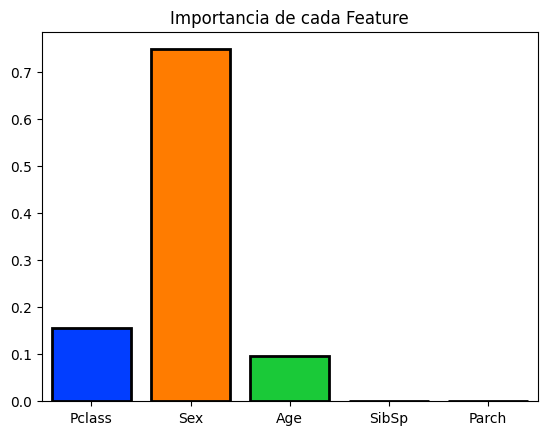

In [30]:
#verify el features importance
#which means how important is each feature is to the model ****

import seaborn as sns

#importances=tree.feature_importances_
#columns =X.columns
#sns.barplot(columns,importances,palette='bright',saturation=2.0,edgecolor='black',linewidth=2)
#plt.title('Features Importance')
#plt.show()

importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)

sns.barplot(data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()

